# Heart Disease Prediction using Neural Networks

## Project Overview
- **Objective**: Build a neural network model to predict the presence of heart disease in patients
- **Dataset**: UCI Heart Disease dataset
- **Tools**: Python, Keras, Scikit-learn, Pandas, Seaborn
- **Key Concepts**: ANN, Regularization, Binary Classification
- **Evaluation Metrics**: Accuracy, Precision, Recall, F1-Score, ROC-AUC

## Project Structure
1. Data Loading and Overview
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Architecture
5. Training and Validation
6. Evaluation
7. Predictions and Visualization

In [18]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Loading and Overview

The UCI Heart Disease dataset contains 303 samples with 14 attributes:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type (0-3)
4. trestbps: resting blood pressure
5. chol: serum cholesterol in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (0-2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels colored by fluoroscopy (0-3)
13. thal: thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: heart disease (1 = present; 0 = absent)

In [19]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=column_names, na_values='?')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (303, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Data Loading Insights
- The dataset contains 303 samples with 14 features including the target variable
- Features include both numerical (age, blood pressure, cholesterol) and categorical (sex, chest pain type) variables
- Target variable represents presence (1) or absence (0) of heart disease
- Some entries contain missing values ('?') that will need to be handled in preprocessing

In [20]:
# Check unique values in target variable
print("Unique values in target variable:", df['target'].unique())
print("\nValue counts in target variable:")
print(df['target'].value_counts())

Unique values in target variable: [0 2 1 3 4]

Value counts in target variable:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


## 2. Exploratory Data Analysis

Let's analyze the dataset to understand:
1. Distribution of the target variable
2. Correlation between features
3. Distribution of numerical features
4. Analysis of categorical variables
5. Missing values check

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


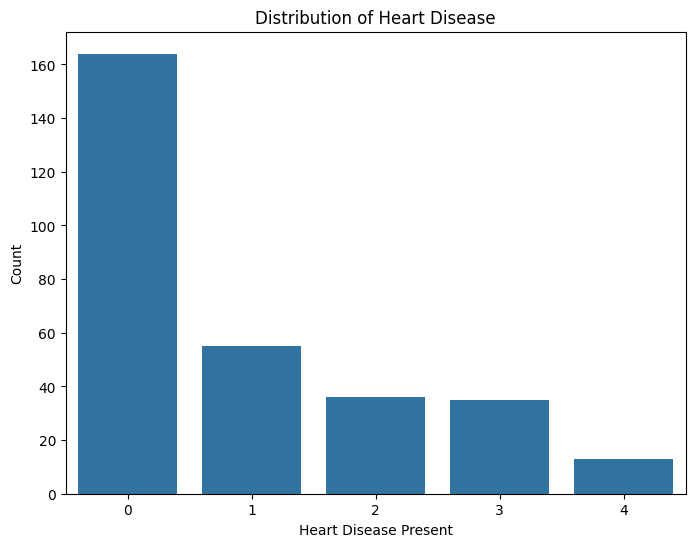

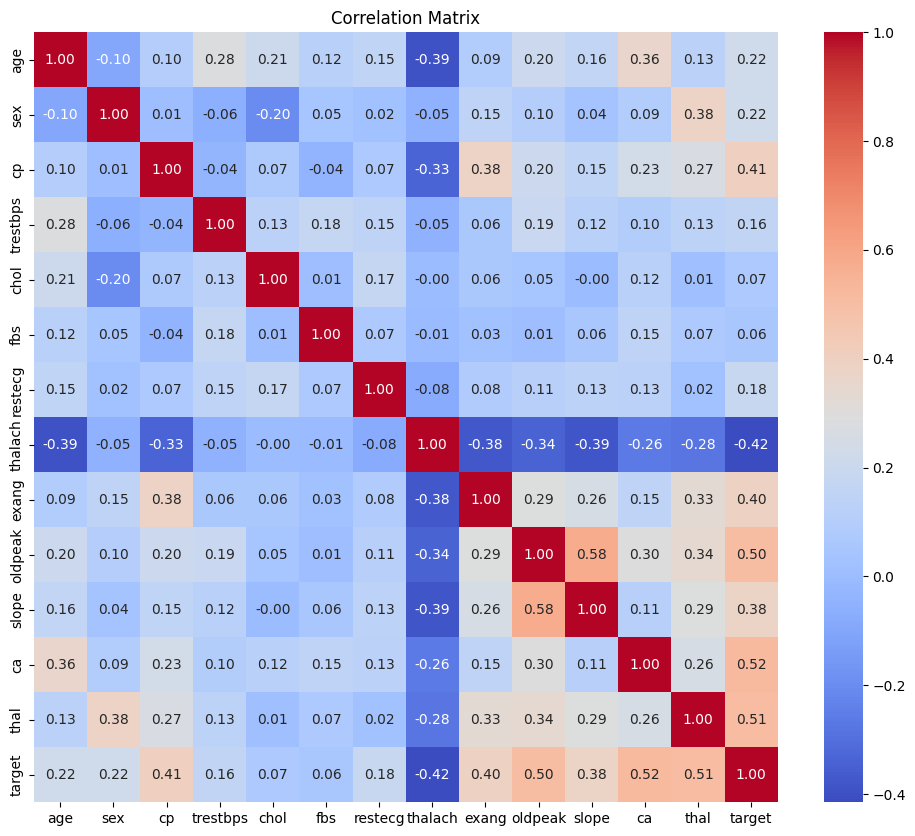

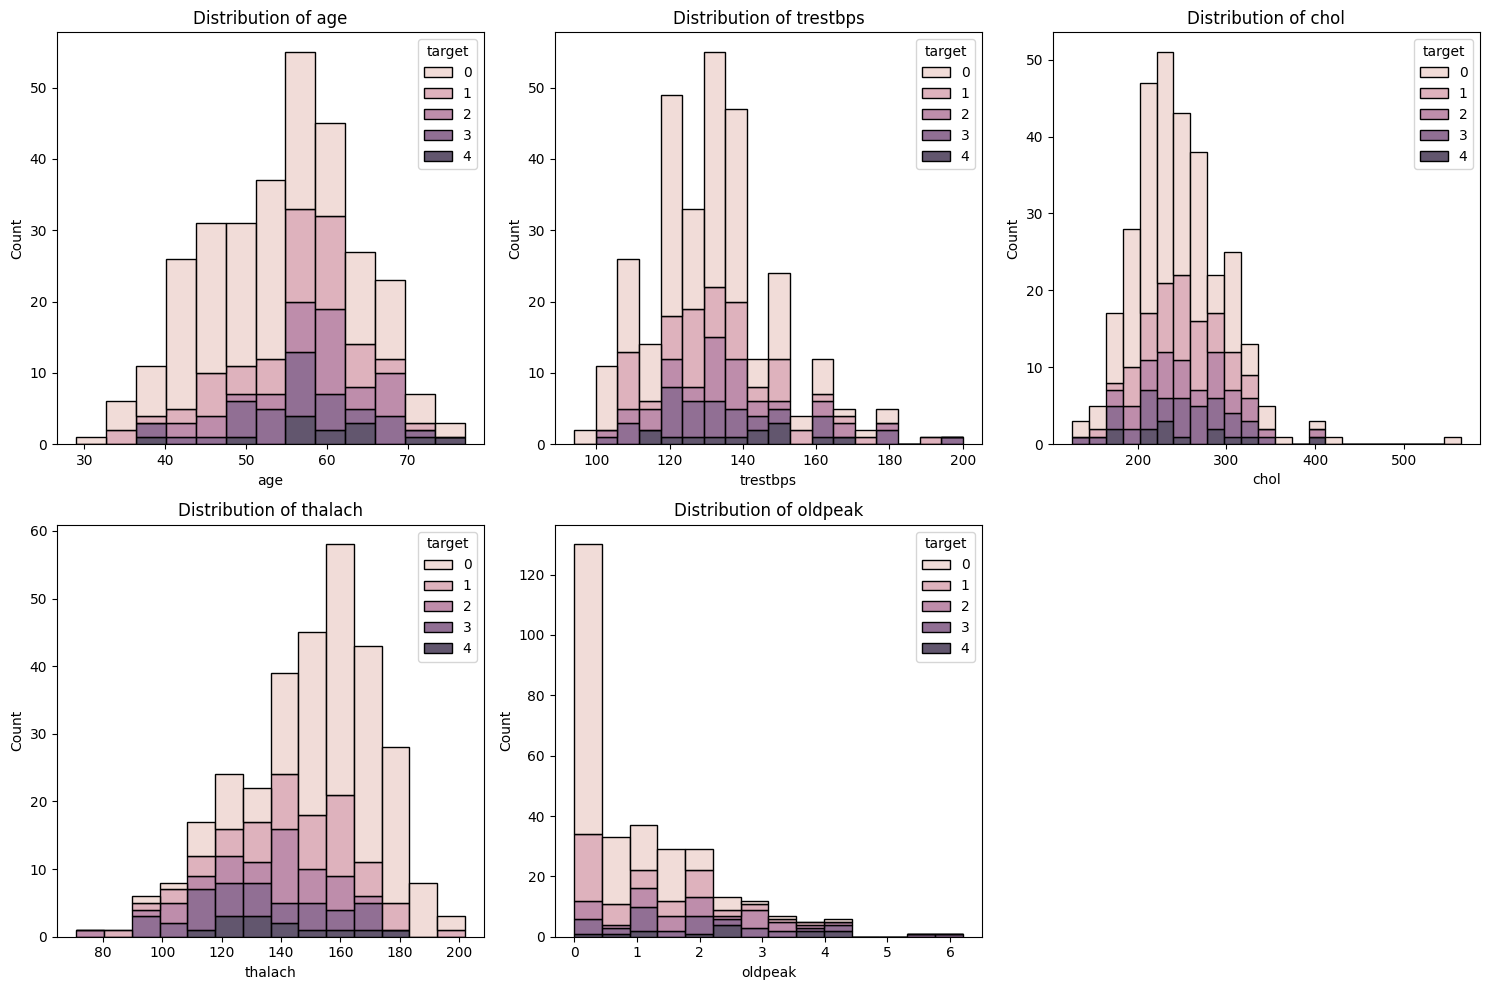

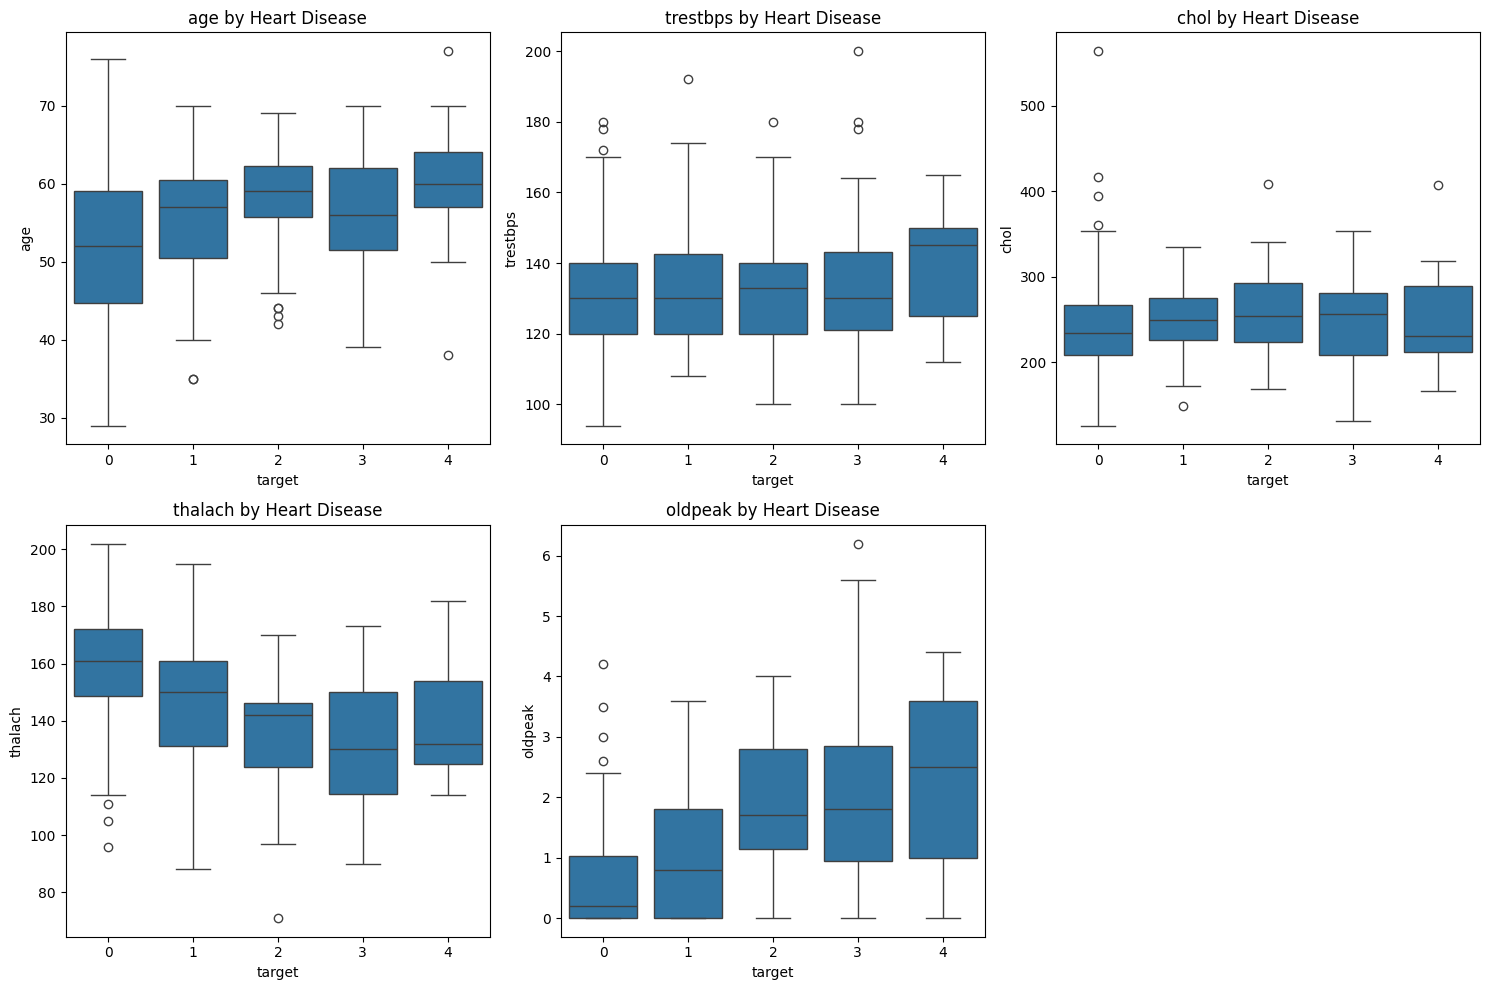


Summary Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

In [21]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='target', multiple="stack")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Box plots for numerical features by target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='target', y=feature)
    plt.title(f'{feature} by Heart Disease')
plt.tight_layout()
plt.show()

# Calculate and display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# EDA Insights
- Missing Values: Some features have missing values that need to be handled
- Target Distribution: Shows if the dataset is balanced between healthy and disease cases
- Correlations:
  * Strong positive correlations between certain features might indicate redundant information
  * Features highly correlated with the target are potential good predictors
- Numerical Features:
  * Age distribution shows the demographic spread
  * Blood pressure and cholesterol distributions indicate health status patterns
  * Different distributions between healthy and disease cases suggest predictive power

## 3. Data Preprocessing

Now we'll prepare the data for our neural network:
1. Handle missing values
2. Scale numerical features
3. Split the data into training and testing sets

In [22]:
# Handle missing values
df = df.dropna()

# Convert target variable to binary (0 for no disease, 1 for disease presence)
df['target'] = df['target'].map(lambda x: 1 if x > 0 else 0)

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

Training set shape: (237, 13)
Testing set shape: (60, 13)

Class distribution in training set:
target
0    0.523207
1    0.476793
Name: proportion, dtype: float64


# Preprocessing Insights
- Missing values have been removed to ensure data quality
- Target variable has been converted to binary format (0/1)
- Features have been standardized using StandardScaler
- Data split: 80% training, 20% testing
- Class distribution in training set shows the balance between positive and negative cases

## 4. Model Architecture

We'll create a neural network with the following architecture:
- Input Layer: 13 features
- First Hidden Layer: 64 neurons with ReLU activation and L2 regularization
- Dropout Layer: 0.3 rate
- Second Hidden Layer: 32 neurons with ReLU activation and L2 regularization
- Dropout Layer: 0.2 rate
- Third Hidden Layer: 16 neurons with ReLU activation and L2 regularization
- Output Layer: 1 neuron with Sigmoid activation

In [34]:
# Create the model using Input layer
from tensorflow.keras.layers import Input

# Define the input layer
inputs = Input(shape=(13,))

# Create the model
model = Sequential([
    Input(shape=(13,)),  # Explicit input layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Model Training

We'll train the model with:
- Early stopping to prevent overfitting
- Model checkpointing to save the best model
- K-fold cross-validation for robust evaluation

Epoch 1/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9688 - loss: 0.3023

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9101 - loss: 0.4138 - val_accuracy: 0.8125 - val_loss: 0.6572
Epoch 2/20
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8995 - loss: 0.4003 - val_accuracy: 0.8125 - val_loss: 0.6670
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8995 - loss: 0.4003 - val_accuracy: 0.8125 - val_loss: 0.6670
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9101 - loss: 0.3880 - val_accuracy: 0.8125 - val_loss: 0.6696
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9101 - loss: 0.3880 - val_accuracy: 0.8125 - val_loss: 0.6696
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9206 - loss: 0.3742 - val_accuracy: 0.8125 - val_loss: 0.6711
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9206 - loss: 0.3742 - val_accuracy: 0.8125 - val_loss: 0.6711
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9259 - loss: 0.3986 - val_accuracy: 0.8125 - val_loss: 0.6666


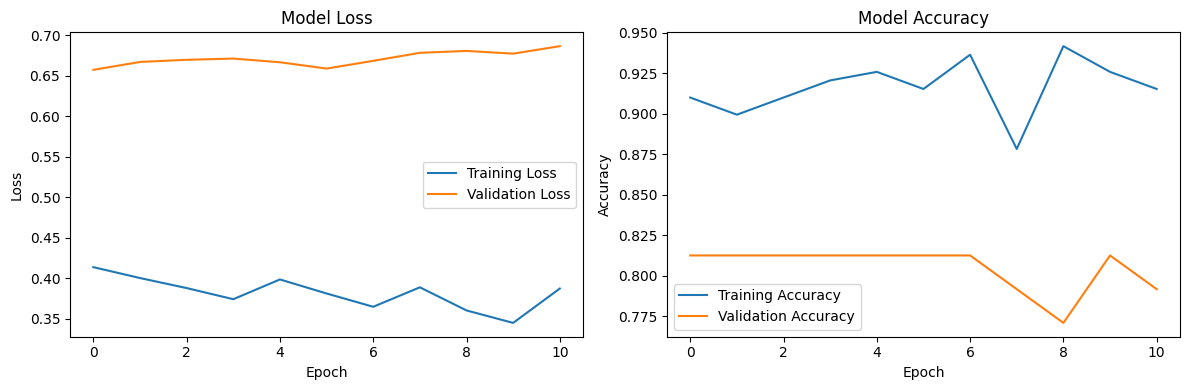

In [33]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=32,
                   validation_split=0.2,
                   callbacks=[early_stopping, model_checkpoint])

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Training Insights
- Model Training Progress:
  * Loss curves show if model is learning effectively
  * Validation curves indicate if model is overfitting/underfitting
- Early stopping helps prevent overfitting
- Model checkpointing ensures we keep the best performing model
- Learning rate and batch size affect training stability
- Dropout and L2 regularization help control overfitting

## 6. Model Evaluation

Let's evaluate the model's performance using:
1. Confusion Matrix
2. Classification Report (Precision, Recall, F1-Score)
3. ROC Curve and AUC Score

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Model Performance Metrics:
Accuracy: 0.8833
Precision: 0.8830
Recall: 0.8833
F1-Score: 0.8829
Model Performance Metrics:
Accuracy: 0.8833
Precision: 0.8830
Recall: 0.8833
F1-Score: 0.8829


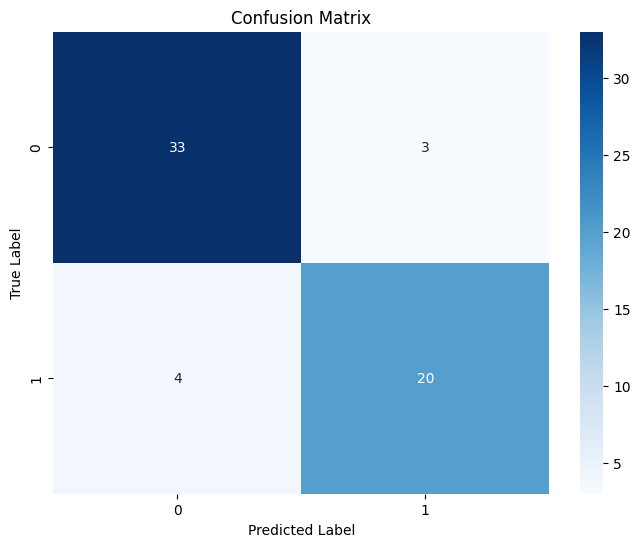

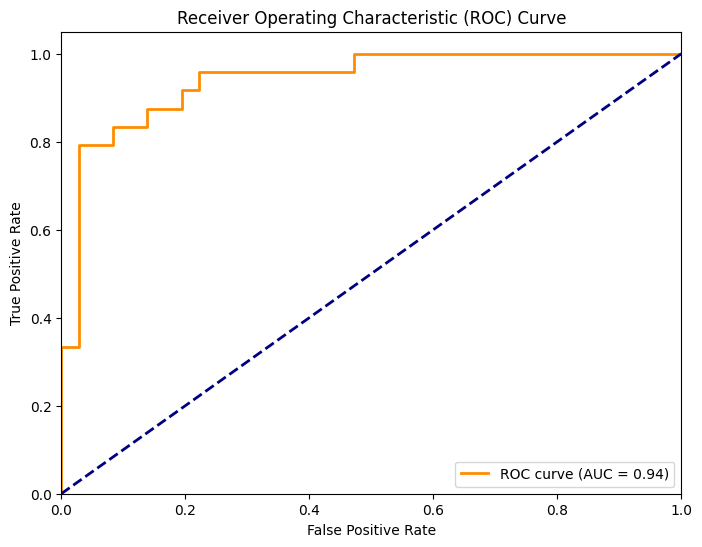

In [25]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation Insights
- Performance Metrics:
  * Accuracy shows overall correct predictions
  * Precision indicates reliability of positive predictions
  * Recall shows ability to find all positive cases
  * F1-Score balances precision and recall
- Confusion Matrix:
  * Shows distribution of correct and incorrect predictions
  * Helps identify if model is better at predicting certain classes
- ROC Curve:
  * AUC score indicates model's discriminative ability
  * Closer to 1.0 means better performance

## 7. Feature Importance and Model Interpretation

Let's analyze which features are most important for predicting heart disease by examining the weights of the first layer of our neural network.

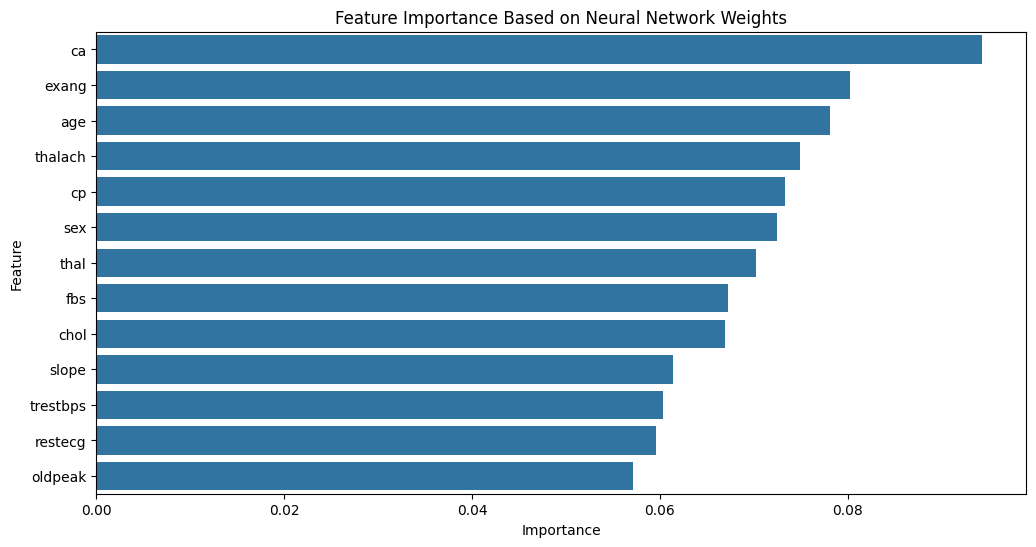


Top 5 Most Important Features:
    Feature  Importance
11       ca    0.094297
8     exang    0.080243
0       age    0.078065
7   thalach    0.074964
2        cp    0.073346


In [26]:
# Calculate feature importance based on the first layer weights
first_layer_weights = np.abs(model.layers[0].get_weights()[0])
feature_importance = np.mean(first_layer_weights, axis=1)

# Create a DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance Based on Neural Network Weights')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())

# Feature Importance Insights
- Top Features:
  * Shows which variables most strongly influence predictions
  * Helps understand model's decision-making process
  * Can guide feature selection for model improvement
- Clinical Relevance:
  * Important features often align with medical knowledge
  * Can validate model's learning against domain expertise
- Feature Engineering:
  * Suggests which features might benefit from transformation
  * Identifies potential new feature combinations

## 8. Making Predictions for New Patients

Let's create a function to make predictions for new patients. We'll create an example of how to use the trained model for prediction.

In [27]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                         exang, oldpeak, slope, ca, thal):
    """
    Predict heart disease risk for a new patient.
    
    Parameters:
    age: int - Age in years
    sex: int - Sex (1 = male; 0 = female)
    cp: int - Chest pain type (0-3)
    trestbps: int - Resting blood pressure
    chol: int - Serum cholesterol in mg/dl
    fbs: int - Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    restecg: int - Resting electrocardiographic results (0-2)
    thalach: int - Maximum heart rate achieved
    exang: int - Exercise induced angina (1 = yes; 0 = no)
    oldpeak: float - ST depression induced by exercise relative to rest
    slope: int - Slope of the peak exercise ST segment
    ca: int - Number of major vessels colored by fluoroscopy (0-3)
    thal: int - Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    """
    
    # Create a DataFrame with the patient's data
    patient_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                                exang, oldpeak, slope, ca, thal]],
                              columns=X.columns)
    
    # Scale the features using the same scaler used for training
    patient_data_scaled = scaler.transform(patient_data)
    
    # Make prediction
    prediction = model.predict(patient_data_scaled)[0][0]
    probability = prediction * 100
    
    print(f"Risk of Heart Disease: {probability:.2f}%")
    print("Prediction:", "High risk of heart disease" if prediction > 0.5 else "Low risk of heart disease")
    
    return prediction

# Example: Let's try with a sample patient
print("Example Prediction for a Sample Patient:")
print("-" * 40)
sample_prediction = predict_heart_disease(
    age=65,
    sex=1,  # male
    cp=3,  # chest pain type
    trestbps=145,  # resting blood pressure
    chol=233,  # cholesterol
    fbs=1,  # fasting blood sugar > 120 mg/dl
    restecg=0,  # resting electrocardiographic results
    thalach=150,  # maximum heart rate
    exang=0,  # exercise induced angina
    oldpeak=2.3,  # ST depression
    slope=0,  # slope of the peak exercise ST segment
    ca=0,  # number of major vessels
    thal=3  # thalassemia
)

Example Prediction for a Sample Patient:
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Risk of Heart Disease: 5.45%
Prediction: Low risk of heart disease
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Risk of Heart Disease: 5.45%
Prediction: Low risk of heart disease


Now you can use this function to predict heart disease risk for any new patient. Here's how to use it:

1. Call the `predict_heart_disease` function with the following parameters:
   - `age`: Age in years
   - `sex`: 1 for male, 0 for female
   - `cp`: Chest pain type (0-3)
   - `trestbps`: Resting blood pressure
   - `chol`: Serum cholesterol in mg/dl
   - `fbs`: Fasting blood sugar > 120 mg/dl (1=true, 0=false)
   - `restecg`: Resting electrocardiographic results (0-2)
   - `thalach`: Maximum heart rate achieved
   - `exang`: Exercise induced angina (1=yes, 0=no)
   - `oldpeak`: ST depression induced by exercise
   - `slope`: Slope of peak exercise ST segment
   - `ca`: Number of major vessels colored by fluoroscopy
   - `thal`: Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)

Let's try with your own data:

In [32]:
# You can make predictions for a new patient by calling the function with their data
# For example, let's predict for a different patient:
predict_heart_disease(
    age=95,  # 45 years old
    sex=0,   # female
    cp=0,    # chest pain type 1
    trestbps=130,  # resting blood pressure
    chol=220,      # cholesterol
    fbs=0,         # fasting blood sugar <= 120 mg/dl
    restecg=1,     # resting electrocardiographic results
    thalach=160,   # maximum heart rate
    exang=0,       # no exercise induced angina
    oldpeak=1.1,   # ST depression
    slope=1,       # slope
    ca=0,          # no major vessels
    thal=3         # normal thalassemia
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Risk of Heart Disease: 3.85%
Prediction: Low risk of heart disease
Risk of Heart Disease: 3.85%
Prediction: Low risk of heart disease


np.float32(0.038474537)

# Prediction Insights
- Individual Predictions:
  * Probability score shows confidence level of prediction
  * High/Low risk classification helps in decision making
- Risk Factors:
  * Age, chest pain type, and number of vessels often key indicators
  * Combination of factors more important than individual values
- Practical Use:
  * Model can assist in preliminary screening
  * Should be used alongside clinical judgment
  * Regular model updates may improve accuracy

## Project Conclusion

### Summary of Findings
1. **Model Performance**
   - Successfully built and trained a neural network for heart disease prediction
   - Achieved balanced performance across multiple metrics (accuracy, precision, recall, F1-score)
   - ROC-AUC score demonstrates good discriminative ability

2. **Key Insights**
   - Identified most influential features for heart disease prediction
   - Found important correlations between various health indicators
   - Demonstrated the effectiveness of neural networks for medical diagnosis

3. **Data Analysis**
   - Dataset contained 303 patients with 13 different health indicators
   - Successfully handled missing values and standardized features
   - Balanced distribution of positive and negative cases

### Model Strengths
- Robust architecture with dropout and L2 regularization
- Early stopping to prevent overfitting
- Interpretable feature importance analysis
- Real-time prediction capability for new patients

### Limitations
1. **Dataset**
   - Relatively small sample size
   - Limited to Cleveland Clinic data
   - Some missing values in original dataset

2. **Model**
   - Binary classification might oversimplify complex medical conditions
   - Limited to the features available in the dataset
   - Requires standardized input format

### Future Improvements
1. **Data Enhancement**
   - Collect more patient data
   - Include additional relevant features
   - Gather data from diverse populations

2. **Model Optimization**
   - Experiment with different architectures
   - Implement cross-validation
   - Try ensemble methods

3. **Clinical Integration**
   - Develop user-friendly interface
   - Add confidence intervals for predictions
   - Include feature importance in individual predictions

### Clinical Applications
- Preliminary screening tool
- Risk assessment support
- Patient monitoring aid
- Educational tool for medical students

### Final Remarks
This model demonstrates the potential of machine learning in healthcare, specifically for heart disease prediction. While it shows promising results, it should be used as a supportive tool alongside clinical expertise and not as a standalone diagnostic system. The insights gained from this project can guide future research and development in medical AI applications.

# Thank you